In [2]:
from EXP1whiteblackground import clean_experiment_data, calculate_row_mlae, plot_mlae_heatmap, average_mlae_and_visualize, plot_vectorized_predictions_scatter, display_images_combined_by_degree, generate_images_for_multiple_angles, analyze_best_model_by_image_type, analyze_image_type_per_model, plot_mlae_per_image

I converted from svg to pdf as input for pretrained models as they won't take svg as an input.

### Generate 55 images with 55 angle degrees with aliased, anti-aliasied, and vectorized images.

In [3]:
#generate_images_for_multiple_angles(canvas_size=100, line_length=30, num_angles=55)

In [4]:
#display_images_combined_by_degree("./generated_images")

### Run experiments

In [5]:
"""

# Add LLMP path
from EXP1whiteblackground import generate_images_for_multiple_angles, display_images_combined_by_degree, Runexp1, prepare_image_data
import LLMP as L
import os

# Use the absolute path for the image directory
image_dir = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/generated_images"

# Ensure the directory exists
if not os.path.exists(image_dir):
    raise FileNotFoundError(f"Image directory does not exist: {image_dir}")

# Prepare image data
data = prepare_image_data(image_dir)

# Define model instances
model_instances = {
    "gpt4o": L.GPTModel("gpt-4o"),
    "LLaMA": L.llama("meta-llama/Llama-3.2-11B-Vision-Instruct"),
    "GeminiProVision": L.GeminiProVision(),
    "Gemini1_5Flash": L.Gemini1_5Flash()
}

# Create Runexp1 instance and run the experiment
experiment = Runexp1()
experiment.run_angle_experiment(data=data, model_instances=model_instances)

"""


'\n\n# Add LLMP path\nfrom EXP1whiteblackground import generate_images_for_multiple_angles, display_images_combined_by_degree, Runexp1, prepare_image_data\nimport LLMP as L\nimport os\n\n# Use the absolute path for the image directory\nimage_dir = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/generated_images"\n\n# Ensure the directory exists\nif not os.path.exists(image_dir):\n    raise FileNotFoundError(f"Image directory does not exist: {image_dir}")\n\n# Prepare image data\ndata = prepare_image_data(image_dir)\n\n# Define model instances\nmodel_instances = {\n    "gpt4o": L.GPTModel("gpt-4o"),\n    "LLaMA": L.llama("meta-llama/Llama-3.2-11B-Vision-Instruct"),\n    "GeminiProVision": L.GeminiProVision(),\n    "Gemini1_5Flash": L.Gemini1_5Flash()\n}\n\n# Create Runexp1 instance and run the experiment\nexperiment = Runexp1()\nexperiment.run_angle_experiment(data=data, model_instances=model_instances)\n\n'

## Clean data and caculate row mlae 

In [7]:
pwd

'/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXP1/EXP1whiteblackground'

In [9]:
from EXP1whiteblackground import clean_experiment_data, calculate_mlae, calculate_row_mlae, plot_mlae_heatmap
import pandas as pd

file_path = "./angle_results_55.csv"

df = pd.read_csv(file_path)

len(df)

df= clean_experiment_data(file_path)

len(df)

# Apply MLAE calculation row-wise
df['MLAE'] = df.apply(calculate_row_mlae, axis=1)

len(df)

3960

## Check how many times each image appear

In [11]:
# Count occurrences of each file_name
file_name_counts = df["file_name"].value_counts()

# Display the counts
file_name_counts

file_name
vectorized_image_white_54.pdf     12
antialiased_image_black_66.png    12
vectorized_image_white_65.pdf     12
vectorized_image_black_39.pdf     12
vectorized_image_white_19.pdf     12
vectorized_image_black_45.pdf     12
vectorized_image_black_42.pdf     12
vectorized_image_white_8.pdf      12
aliased_image_white_4.png         12
aliased_image_white_55.png        12
aliased_image_white_89.png        12
aliased_image_white_24.png        12
aliased_image_white_23.png        12
vectorized_image_white_66.pdf     12
antialiased_image_black_65.png    12
antialiased_image_white_39.png    12
antialiased_image_black_19.png    12
antialiased_image_white_45.png    12
antialiased_image_white_54.png    12
antialiased_image_white_82.png    12
aliased_image_black_15.png        12
vectorized_image_black_50.pdf     12
vectorized_image_white_70.pdf     12
aliased_image_black_69.png        12
aliased_image_white_35.png        12
antialiased_image_white_42.png    12
vectorized_image_black_59.pd

#### Analyze which image type works best for each model

Summed MLAE by image type:
                image_type       MLAE
0      aliased_image_black  15.743369
1      aliased_image_white  15.827878
2  antialiased_image_black  15.772993
3  antialiased_image_white  16.449959
4   vectorized_image_black  16.210630
5   vectorized_image_white  16.199497

Lowest summed MLAE goes to:
image_type    aliased_image_black
MLAE                    15.743369
Name: 0, dtype: object


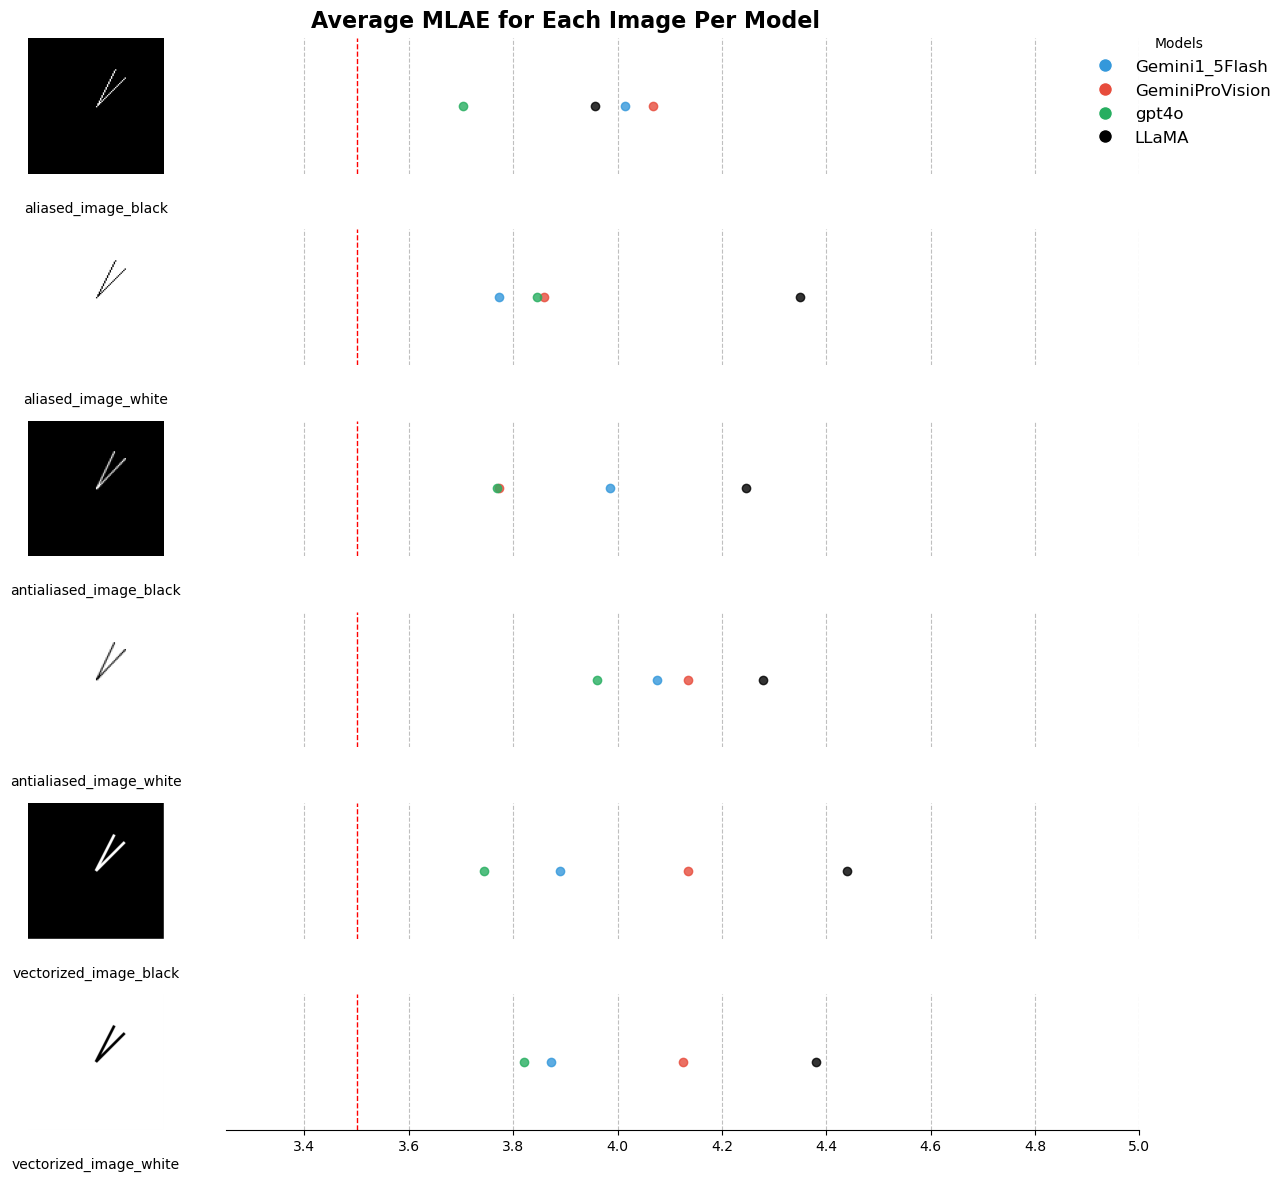

In [12]:
from EXP1whiteblackground import plot_mlae_per_image

# Call the function
plot_mlae_per_image(
    df=df,
    image_folder="./generated_images",
    model_colors={
        'Gemini1_5Flash': '#3498DB',  # Blue
        'GeminiProVision': '#E74C3C',  # Red
        'gpt4o': '#27AE60',           # Green
        'LLaMA': '#000000'
    }
)

#